<a href="https://colab.research.google.com/github/KiboSennin/ADA-Informes-/blob/main/Insertion_sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) **Problema de ordenamiento**

  Entrada: *Secuencia de n números (a1, a2, a3,....., an).*

  

 Salida: *La permutacion ordenada de los n números.*

          a1 <= a2 <= a3 ,...., <= an. 



***foto descriptiva:***

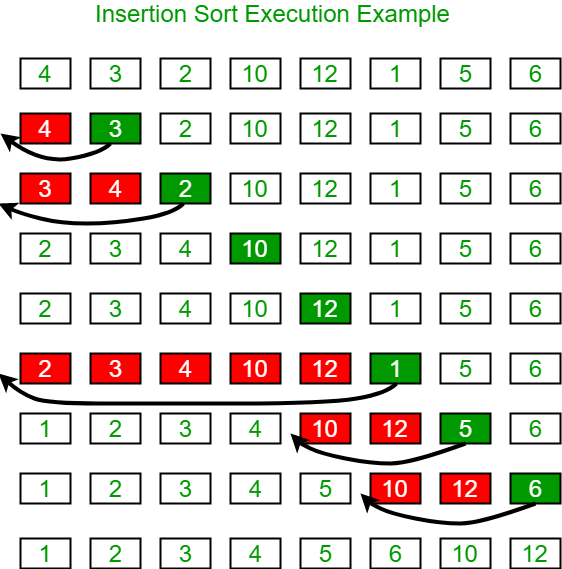


# 1.1) **Insertion Sort**

  Implementación del codigo Insertion Sort


In [58]:
import random
from termcolor import colored
import copy

def insertionSort(lista, verbose=False):
    contador = 0                                                                      # Contador de comparaciones
    aux = len(lista)
    if verbose == True: print("input array:",lista)

    for i in range(0, len(lista)):
        if verbose == True: print("\nPasada",i)                                       
        already_sorted = True                                                         # Flag la cual indica si el arreglo se encuentra ordenado
        array = lista[i]
        j = i - 1

        
        while j > 0 and array < lista[j]:                                             # Se recorre el arreglo 
            contador +=1
            lista[j+1] = lista[j]                                                     # Intercambia el dato a la posición correspondiente
            if verbose == True: 
                print(str(lista[:j])[1:-1],",",colored(f"{str(lista[j:j+2])[1:-1]}","red"),",",str(lista[j+2:])[1:-1])
            j -= 1

            already_sorted = False

        lista[j + 1 ] = array

        if already_sorted == False and verbose == True: 
           print("\nAl finalizar pasada:")
           print(str(lista[:aux-i])[1:-1],",",colored(f"{str(lista[-i:])[1:-1]}","blue"))
     
        if already_sorted:
            if verbose == True: print("Está ordenado")
    
    if verbose == True: print("\noutput array:",lista)       
    
    return lista, contador

A=[23, 106, 78, 1001, 166, 323, 5003 ]

print("Entrada: ",A)
A, contador = insertionSort(A)
print("Salida: ",A)
print("# comparaciones: ", contador)

Entrada:  [23, 106, 78, 1001, 166, 323, 5003]
Salida:  [23, 78, 106, 166, 323, 1001, 5003]
# comparaciones:  3


# **1.2 Descripción del algoritmo**

  *El algoritmo recibe como entrada una lista (array) con una secuencia la cual queremos ordenar. Luego, los números se ordenan dentro de la misma lista.

 >    Cada iteración recorre una posicion de la lista secuencialmente, a la vez que va verificando si el número de la posición _lista[ j ]_ es mayor o igual a la posicion siguiente _lista[ j + 1 ]_, cuando se cumple dicha condición cambia la posición y esta queda guardada ordenadamente.

 >  En caso que la lista este ordenada no realiza comparaciones y termina el algoritmo.

 >  Finalmete se retorna siempre el arreglo de forma ordenada con 0 repeticiones en el contador.





# 2) **Correctitud**

  Para provar la correctitud de este algotirmo podremos usar la propiedad invariante de bucle.
  
 > Inicialización
 Si tenemos el caso en el cual 

```
j = 2
lista[1....j-1] ---> lista[1]  // si j = 2, la lista siempre va a tener un unico valor y este estará ordenado.

lista[1] is sorted!

```

 
 > Mantención 
  
*Si podemos afirmar que lo anterior es cierto entonces*

```
lista[1.....j-1] ---> es correcto

Mientras que lista[j] este en una iteración podemos afirmar que sigue correcto

por lo que

lista[1....j] ---> sigue siendo correcto

para la siguiente iteración podemos decir

j = j + 1
---
lista[1.....j] esta ordenada

Y enconsecuencia la siguiente iteración también estará ordenada y se mantendra mientras siga invariante el loop.


```






# 3) **Análisis** 

*Analisis del tiempo de ejecución del algoritmo*


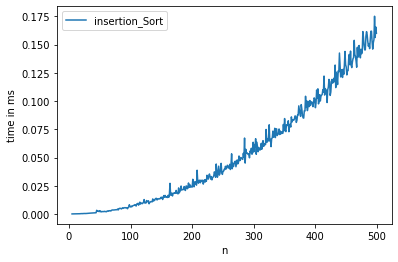

In [44]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  # La función repeat está ejecutando 20 veces insertionSort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["insertion_Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

*El algotirmo a mas repeticiones realizadas mas tiempo tarda en cada una de ellas aumentado exponencialmente el tiempo de ejecución del algoritmo.*

*O(n^2) siendo el tiempo de ejecucion de este algoritmo, esto se debe a que en el peor de los casos el algoritmo tiene que verificar desde la ultima posición hasta la primera.*

*Ejemplo de ello a continuación* 

In [87]:
a =[6, 5, 4, 3, 2, 1];
print("Entrada no ordenada:",a)
a,counter=insertionSort(a,True)
print("Salida ordenada:",a)
print("Total de comparaciones realizadas:",counter)

Entrada no ordenada: [6, 5, 4, 3, 2, 1]
input array: [6, 5, 4, 3, 2, 1]

Pasada 0
Está ordenado

Pasada 1
Está ordenado

Pasada 2
6 , 5, 5 , 3, 2, 1

Al finalizar pasada:
6, 4, 5, 3 , 2, 1

Pasada 3
6, 4 , 5, 5 , 2, 1
6 , 4, 4 , 5, 2, 1

Al finalizar pasada:
6, 3, 4 , 5, 2, 1

Pasada 4
6, 3, 4 , 5, 5 , 1
6, 3 , 4, 4 , 5, 1
6 , 3, 3 , 4, 5, 1

Al finalizar pasada:
6, 2 , 3, 4, 5, 1

Pasada 5
6, 2, 3, 4 , 5, 5 , 
6, 2, 3 , 4, 4 , 5
6, 2 , 3, 3 , 4, 5
6 , 2, 2 , 3, 4, 5

Al finalizar pasada:
6 , 1, 2, 3, 4, 5

output array: [6, 1, 2, 3, 4, 5]
Salida ordenada: [6, 1, 2, 3, 4, 5]
Total de comparaciones realizadas: 10


# 4) **Experimentos**

# 4.1)
*Para el primer caso de experimentación queremos ver como funciona el codigo teniendo un caso teorico idea y no ideal.*

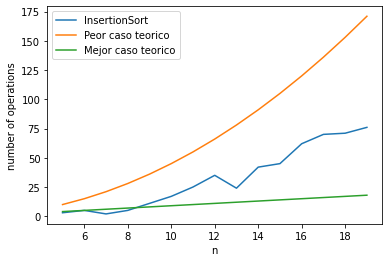

In [88]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y1=[n*(n-1)/2 for n in range(5,20)] # Peor caso
y2=[n-1 for n in range(5,20)] # Mejor caso
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  a,counter = insertionSort(a)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["InsertionSort", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

*Al tomar numeros aleatorios podemos ver que al inicio tine un número casi ideal de repeticiones pero despues de la onceaba iteración la cantidad de estas aumenta considerablemente cada vez.*

# 4.2)
_Para el segundo caso queremos ver como se comporta el algoritmo con un arreglo casi perfecto._

1
5
2
3
4
6
20
7
8
9
10
12
11
13
14


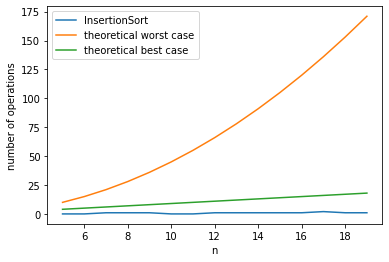

In [84]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y1=[n*(n-1)/2 for n in range(5,20)] # worst case
y2=[n-1 for n in range(5,20)] # best case
y=[]; 
a = []

for n in range(5,20):
  a.append(int(input())) 
  a,counter = insertionSort(a)
  y.append(counter)


plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["InsertionSort", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

_En un caso casi perfecto podemos ver que la cantidad de iteraciones es casi despreciable, puesto que el algoritmo no realiza muchas iteraciones supera al caso idealizado **n - 1**._

# 4.3 )
*Y por ultimo la comparación de los tiempo de ejecución del bubble sort con el insertion sort*



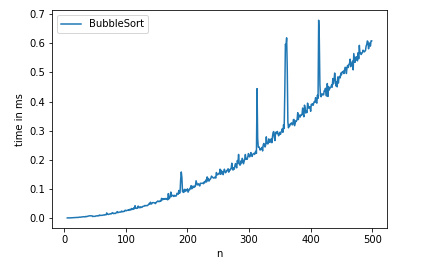



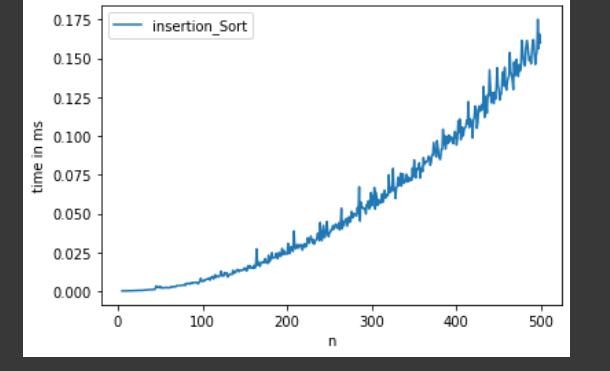




*Al ver ambas graficas de tiempo podemos ver que ambas son graficas de crecimiento exponencial(O(n^2)), sin embargo la grafica del insertion sort es mucho mas rapido en comparacion al bubble sort*.

*Esto es por el diseño y funcionamiento de estos algoritmos ya que el bubble sort ya que este realiza varias vueltas al arreglo hasta que finalmente se ordena en cambio el insertion sort ordena todo en una sola pasada lo cual en volumenes mas grandes de datos termina siendo considerablemente mas rápido.*